**Artificial Intelligence through Machine Learning for Model Development and Deloyment**

**Import libraries and Load Data**

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data processing and analysis
import numpy as np
import pandas as pd
import math
import re


# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py



# Configure visualisations
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)


# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb


# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_selector as selector


# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("/content/RemittanceInflow_EconDev_Model.csv")

In [3]:
df.head()

,Country,Country_Code,Region,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,Remittance_Percent_of_GDP,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Human_Development_Index_HDI_Index_Unit,Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth,Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,Poverty_headcount_ratio_at_societal_poverty_line_Percent_of_population,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD,Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015_USD,Literacy_rate_youth_total_Percent_of_people_ages_15_to_24
0,India,IND,Emerging and Developing Asia,2000,1.000000e+10,4.683960e+11,2.751,2.000000e+12,46.940,0.490,3.439589,NaN,NaN,NaN,2.985500e+11,488.073986,NaN
1,India,IND,Emerging and Developing Asia,2001,1.000000e+10,4.854400e+11,2.940,2.000000e+12,49.025,0.495,5.952897,NaN,NaN,NaN,3.113950e+11,507.860593,76.425697
2,India,IND,Emerging and Developing Asia,2002,2.000000e+10,5.149380e+11,3.056,2.000000e+12,51.475,0.501,2.870479,NaN,NaN,NaN,3.245640e+11,513.238079,NaN
3,India,IND,Emerging and Developing Asia,2003,2.000000e+10,6.077010e+11,3.456,3.000000e+12,53.583,0.514,5.925320,NaN,NaN,NaN,3.737580e+11,534.355461,NaN
4,India,IND,Emerging and Developing Asia,2004,2.000000e+10,7.091520e+11,2.644,3.000000e+12,55.725,0.523,5.171126,NaN,48.2,40.6,4.137990e+11,552.664856,NaN


In [4]:
df.dtypes

Country                                                                              object
Country_Code                                                                         object
Region                                                                               object
Year                                                                                  int64
Remittance_inflow_US_Dollar                                                         float64
GDP_current_prices_US_Dollar                                                        float64
Remittance_Percent_of_GDP                                                           float64
GDP_current_prices_PPP_international_dollars                                        float64
Inflation_average_consumer_prices_Index_Unit                                        float64
Human_Development_Index_HDI_Index_Unit                                              float64
Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth           

# **Features Complementing EDA for Modeling**

**Poverty_headcount_ratio_at_2.15_USD_a_day_2017_PPP_Percent_of_Population**
Poverty headcount ratio at  US Dollar 2.15 a day is the percentage of the population living on less than US Dollar 2.15 a day at 2017 international prices.

**Households_and_NPISHs_Final_consumption_expenditure_current_USD:** Household and NPISHs final consumption expenditure (formerly private consumption) is the market value of all goods and services, including durable products (such as cars, washing machines, and home computers), purchased by households. It excludes purchases of dwellings but includes imputed rent for owner-occupied dwellings. It also includes payments and fees to governments to obtain permits and licenses. This indicator includes the expenditures of nonprofit institutions serving households even when reported separately by the country. Data are in current U.S. dollars.

**Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015 _USD:** Household final consumption expenditure per capita (private consumption per capita) is calculated using private consumption in constant 2015 prices and World Bank population estimates. Household final consumption expenditure is the market value of all goods and services, including durable products (such as cars, washing machines, and home computers), purchased by households. It excludes purchases of dwellings but includes imputed rent for owner-occupied dwellings. It also includes payments and fees to governments to obtain permits and licenses. Here, household consumption expenditure includes the expenditures of nonprofit institutions serving households, even when reported separately by the country. Data are in constant 2015 U.S. dollars.

**Literacy_rate_youth_total_Percent_of_people_ages_15_to_24:** As an indicator for basic education, Youth literacy rate is the percentage of people ages 15-24 who can both read and write with understanding a short simple statement about their everyday life.


**## Refer to Features descrided in EDA notebook**

In [5]:
df.describe()

,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,Remittance_Percent_of_GDP,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Human_Development_Index_HDI_Index_Unit,Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth,Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,Poverty_headcount_ratio_at_societal_poverty_line_Percent_of_population,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD,Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015_USD,Literacy_rate_youth_total_Percent_of_people_ages_15_to_24
count,240.000000,2.400000e+02,2.400000e+02,240.000000,2.400000e+02,240.000000,227.000000,196.000000,27.000000,78.000000,78.000000,2.070000e+02,197.000000,88.000000
mean,2011.500000,2.162083e+10,1.255706e+12,5.696263,2.690875e+12,94.059758,0.625317,5.102141,10.848148,33.764103,14.721795,6.080843e+11,2394.690810,88.812845
std,6.936653,2.082643e+10,3.019236e+12,4.062105,5.212730e+12,71.060127,0.089837,3.554290,10.399348,12.054767,17.367701,1.145346e+12,1844.107413,11.540762
min,2000.000000,0.000000e+00,1.210600e+10,0.000000,6.000000e+10,8.226000,0.434000,-10.636724,1.700000,18.300000,0.100000,5.610551e+09,488.073986,61.872810
25%,2005.750000,6.000000e+09,8.945550e+10,2.804250,3.000000e+11,53.184250,0.541500,3.334758,2.900000,26.475000,3.000000,6.042384e+10,1049.555840,79.043604
50%,2011.500000,2.000000e+10,2.987070e+11,5.104000,8.500000e+11,79.592500,0.636000,5.000866,5.300000,32.100000,9.600000,2.102700e+11,1901.598110,93.501736
75%,2017.250000,3.000000e+10,9.232440e+11,8.585000,2.000000e+12,109.946250,0.697000,7.164013,19.500000,36.950000,18.175000,6.694650e+11,2966.763350,98.534618
max,2023.000000,1.000000e+11,1.784850e+13,20.619000,3.000000e+13,571.766000,0.796000,15.046927,39.700000,81.500000,81.500000,6.792010e+12,7183.020938,100.000000


In [6]:
df.isnull().sum()

Country                                                                               0
Country_Code                                                                          0
Region                                                                                0
Year                                                                                  0
Remittance_inflow_US_Dollar                                                           0
GDP_current_prices_US_Dollar                                                          0
Remittance_Percent_of_GDP                                                             0
GDP_current_prices_PPP_international_dollars                                          0
Inflation_average_consumer_prices_Index_Unit                                          0
Human_Development_Index_HDI_Index_Unit                                               13
Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth                44
Multidimensional_poverty_headcou

In [7]:
df['Human_Development_Index_HDI_Index_Unit'] = df['Human_Development_Index_HDI_Index_Unit'].fillna(0.6253)

In [8]:
df['Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'].fillna(df['Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'].mean(), inplace = True)

In [9]:
df['Poverty_headcount_ratio_at_societal_poverty_line_Percent_of_population'].fillna(df['Poverty_headcount_ratio_at_societal_poverty_line_Percent_of_population'].mean(), inplace = True)

In [10]:
df['Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population'].fillna(df['Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population'].mean(), inplace = True)

In [11]:
df['Households_and_NPISHs_Final_consumption_expenditure_current_USD'].fillna(df['Households_and_NPISHs_Final_consumption_expenditure_current_USD'].mean(), inplace = True)

In [12]:
df['Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth'].fillna(df['Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth'].mean(), inplace = True)

In [13]:
df['Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015_USD'].fillna(df['Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015_USD'].mean(), inplace = True)

In [14]:
df['Literacy_rate_youth_total_Percent_of_people_ages_15_to_24'].fillna(df['Literacy_rate_youth_total_Percent_of_people_ages_15_to_24'].mean(), inplace = True)

In [15]:
df.isnull().sum()

Country                                                                             0
Country_Code                                                                        0
Region                                                                              0
Year                                                                                0
Remittance_inflow_US_Dollar                                                         0
GDP_current_prices_US_Dollar                                                        0
Remittance_Percent_of_GDP                                                           0
GDP_current_prices_PPP_international_dollars                                        0
Inflation_average_consumer_prices_Index_Unit                                        0
Human_Development_Index_HDI_Index_Unit                                              0
Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth               0
Multidimensional_poverty_headcount_ratio_WorldBank_Per

**Correlation of Features**

In [17]:
df.corr(numeric_only=True)['Remittance_inflow_US_Dollar'].sort_values(ascending=False)

Remittance_inflow_US_Dollar                                                         1.000000
GDP_current_prices_PPP_international_dollars                                        0.674007
Households_and_NPISHs_Final_consumption_expenditure_current_USD                     0.636314
GDP_current_prices_US_Dollar                                                        0.579632
Year                                                                                0.518636
Human_Development_Index_HDI_Index_Unit                                              0.336123
Inflation_average_consumer_prices_Index_Unit                                        0.297473
Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth               0.149642
Literacy_rate_youth_total_Percent_of_people_ages_15_to_24                           0.136355
Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015_USD    0.100660
Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_populati

**Selection of Features to retain following insights from correlation output**

Most Features with null values from previous assessment are dropped, however, Multideimesional poverty indicator is still retained regardless of sparse available data/value in an attempt to address one of the objectives of the project.

In [24]:
new_df=df.drop(columns = ['Country_Code', 'Poverty_headcount_ratio_at_societal_poverty_line_Percent_of_population', 'Literacy_rate_youth_total_Percent_of_people_ages_15_to_24', 'Households_NPISHs_Final_consumption_expenditure_Annual_Percent_growth', 'Households_and_NPISHs_Final_consumption_expenditure_per_capita_constant_2015_USD', 'Remittance_Percent_of_GDP'])

In [36]:
new_df.corr(numeric_only=True)['Remittance_inflow_US_Dollar'].sort_values(ascending=False)

Remittance_inflow_US_Dollar                                                 1.000000
GDP_current_prices_PPP_international_dollars                                0.674007
Households_and_NPISHs_Final_consumption_expenditure_current_USD             0.636314
GDP_current_prices_US_Dollar                                                0.579632
Year                                                                        0.518636
Human_Development_Index_HDI_Index_Unit                                      0.336123
Inflation_average_consumer_prices_Index_Unit                                0.297473
Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population   -0.105183
Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population    -0.228579
Name: Remittance_inflow_US_Dollar, dtype: float64

In [37]:
new_df

,Country,Region,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Human_Development_Index_HDI_Index_Unit,Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD
0,India,Emerging and Developing Asia,2000,1.000000e+10,4.683960e+11,2.000000e+12,46.940,0.4900,10.848148,14.721795,2.985500e+11
1,India,Emerging and Developing Asia,2001,1.000000e+10,4.854400e+11,2.000000e+12,49.025,0.4950,10.848148,14.721795,3.113950e+11
2,India,Emerging and Developing Asia,2002,2.000000e+10,5.149380e+11,2.000000e+12,51.475,0.5010,10.848148,14.721795,3.245640e+11
3,India,Emerging and Developing Asia,2003,2.000000e+10,6.077010e+11,3.000000e+12,53.583,0.5140,10.848148,14.721795,3.737580e+11
4,India,Emerging and Developing Asia,2004,2.000000e+10,7.091520e+11,3.000000e+12,55.725,0.5230,10.848148,40.600000,4.137990e+11
...,...,...,...,...,...,...,...,...,...,...,...
235,Uzbekistan,Middle East and Central Asia,2019,9.000000e+09,6.028400e+10,3.000000e+11,88.599,0.7250,10.848148,14.721795,3.589388e+10
236,Uzbekistan,Middle East and Central Asia,2020,7.000000e+09,6.022500e+10,3.000000e+11,100.000,0.7160,10.848148,14.721795,3.546093e+10
237,Uzbekistan,Middle East and Central Asia,2021,9.000000e+09,6.960100e+10,3.000000e+11,110.849,0.7210,10.848148,14.721795,4.161363e+10
238,Uzbekistan,Middle East and Central Asia,2022,2.000000e+10,8.116700e+10,3.000000e+11,123.538,0.7270,2.300000,2.300000,4.977692e+10


In [38]:
new_df.isnull().sum()

Country                                                                     0
Region                                                                      0
Year                                                                        0
Remittance_inflow_US_Dollar                                                 0
GDP_current_prices_US_Dollar                                                0
GDP_current_prices_PPP_international_dollars                                0
Inflation_average_consumer_prices_Index_Unit                                0
Human_Development_Index_HDI_Index_Unit                                      0
Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population    0
Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population     0
Households_and_NPISHs_Final_consumption_expenditure_current_USD             0
dtype: int64

In [39]:
#creating categorical and numerical list using make_column_selector from sklearn.compose

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)

In [40]:
categorical_columns

['Country', 'Region']

In [41]:
numerical_columns

['Year',
 'Remittance_inflow_US_Dollar',
 'GDP_current_prices_US_Dollar',
 'GDP_current_prices_PPP_international_dollars',
 'Inflation_average_consumer_prices_Index_Unit',
 'Human_Development_Index_HDI_Index_Unit',
 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population',
 'Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population',
 'Households_and_NPISHs_Final_consumption_expenditure_current_USD']

In [43]:
#Splitting variables into target and features

target = ['Human_Development_Index_HDI_Index_Unit']
features_cols=[col for col in numerical_columns if col not in target]
features_cols

['Year',
 'Remittance_inflow_US_Dollar',
 'GDP_current_prices_US_Dollar',
 'GDP_current_prices_PPP_international_dollars',
 'Inflation_average_consumer_prices_Index_Unit',
 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population',
 'Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population',
 'Households_and_NPISHs_Final_consumption_expenditure_current_USD']

In [48]:
# Scaling the data using MinMax Scaller

scaled_features = MinMaxScaler().fit_transform(new_df[features_cols])
#scaled_features = StandardScaler().fit_transform(new_df)
num_features = pd.DataFrame(data=scaled_features)
num_features.rename(columns=dict(zip(num_features.columns.tolist(), features_cols)), inplace=True)

In [49]:
num_features

,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD
0,0.000000,0.10,0.025582,0.064796,0.068698,0.240741,0.179629,0.043166
1,0.043478,0.10,0.026538,0.064796,0.072398,0.240741,0.179629,0.045058
2,0.086957,0.20,0.028191,0.064796,0.076745,0.240741,0.179629,0.046999
3,0.130435,0.20,0.033392,0.098196,0.080486,0.240741,0.179629,0.054248
4,0.173913,0.20,0.039080,0.098196,0.084287,0.240741,0.497543,0.060148
...,...,...,...,...,...,...,...,...
235,0.826087,0.09,0.002701,0.008016,0.142622,0.240741,0.179629,0.004462
236,0.869565,0.07,0.002698,0.008016,0.162853,0.240741,0.179629,0.004399
237,0.913043,0.09,0.003223,0.008016,0.182104,0.240741,0.179629,0.005305
238,0.956522,0.20,0.003872,0.008016,0.204621,0.015789,0.027027,0.006508


In [50]:
# checking the min and max in the features column
min_max_dict_num = {}
num = df[features_cols]

for col in num.columns:
    maximum = num[col].max()
    minimum = num[col].min()
    min_max_dict_num[col] = {'max': maximum, 'min': minimum}
min_max_dict_num

{'Year': {'max': 2023, 'min': 2000},
 'Remittance_inflow_US_Dollar': {'max': 100000000000.0, 'min': 0.0},
 'GDP_current_prices_US_Dollar': {'max': 17848500000000.0,
  'min': 12106000000.0},
 'GDP_current_prices_PPP_international_dollars': {'max': 30000000000000.0,
  'min': 60000000000.0},
 'Inflation_average_consumer_prices_Index_Unit': {'max': 571.766,
  'min': 8.226},
 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': {'max': 39.7,
  'min': 1.7},
 'Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population': {'max': 81.5,
  'min': 0.1},
 'Households_and_NPISHs_Final_consumption_expenditure_current_USD': {'max': 6792010000000.0,
  'min': 5610550954.0}}

In [51]:
catego_data=df[categorical_columns]
target_var=df[target]

In [52]:
catego_data

,Country,Region
0,India,Emerging and Developing Asia
1,India,Emerging and Developing Asia
2,India,Emerging and Developing Asia
3,India,Emerging and Developing Asia
4,India,Emerging and Developing Asia
...,...,...
235,Uzbekistan,Middle East and Central Asia
236,Uzbekistan,Middle East and Central Asia
237,Uzbekistan,Middle East and Central Asia
238,Uzbekistan,Middle East and Central Asia


In [53]:
# Encode categorical data

le = LabelEncoder()
cat_data = catego_data.apply(le.fit_transform)

# Scale the categorical data using MinMaxScaler
cat_scaled_features = MinMaxScaler().fit_transform(cat_data)

# Create a new DataFrame with the scaled features
cat_num_features = pd.DataFrame(data=cat_scaled_features)

# Rename the columns of the new DataFrame
cat_num_features.rename(columns=dict(zip(cat_num_features.columns.tolist(), categorical_columns)), inplace=True)

# Print the new DataFrame
print(cat_num_features.head())

    Country  Region
0  0.444444     0.0
1  0.444444     0.0
2  0.444444     0.0
3  0.444444     0.0
4  0.444444     0.0


In [54]:
# checking the min and max in the categorical columns
min_max_dict_cat = {}

for col in cat_data.columns:
    maximum = cat_data[col].max()
    minimum = cat_data[col].min()
    min_max_dict_cat[col] = {'max': maximum, 'min': minimum}
min_max_dict_cat



{'Country': {'max': 9, 'min': 0}, 'Region': {'max': 3, 'min': 0}}

In [55]:
# Enconding the categorical data using LabelEncoder
encoder = LabelEncoder()
cat_dict = {}
for col in categorical_columns:
    cat_data[col] = encoder.fit_transform(cat_data[col])
    col_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    cat_dict[col] = col_mapping

In [56]:
cat_data

,Country,Region
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
...,...,...
235,9,2
236,9,2
237,9,2
238,9,2


In [57]:
# Scaling the categorical data using MinMax

cat_scaled_features = MinMaxScaler().fit_transform(cat_data)
#scaled_features = StandardScaler().fit_transform(new_data)
cat_num_features = pd.DataFrame(data=cat_scaled_features)
cat_num_features.rename(columns=dict(zip(cat_num_features.columns.tolist(), categorical_columns)), inplace=True)



In [100]:
cat_num_features

,Country,Region
0,0.444444,0.000000
1,0.444444,0.000000
2,0.444444,0.000000
3,0.444444,0.000000
4,0.444444,0.000000
...,...,...
235,1.000000,0.666667
236,1.000000,0.666667
237,1.000000,0.666667
238,1.000000,0.666667


In [99]:
scaled_data2 = pd.concat([num_features, cat_num_features, target_var], axis = 1)
scaled_data2

,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD,Country,Region,Human_Development_Index_HDI_Index_Unit
0,0.000000,0.10,0.025582,0.064796,0.068698,0.240741,0.179629,0.043166,0.444444,0.000000,0.4900
1,0.043478,0.10,0.026538,0.064796,0.072398,0.240741,0.179629,0.045058,0.444444,0.000000,0.4950
2,0.086957,0.20,0.028191,0.064796,0.076745,0.240741,0.179629,0.046999,0.444444,0.000000,0.5010
3,0.130435,0.20,0.033392,0.098196,0.080486,0.240741,0.179629,0.054248,0.444444,0.000000,0.5140
4,0.173913,0.20,0.039080,0.098196,0.084287,0.240741,0.497543,0.060148,0.444444,0.000000,0.5230
...,...,...,...,...,...,...,...,...,...,...,...
235,0.826087,0.09,0.002701,0.008016,0.142622,0.240741,0.179629,0.004462,1.000000,0.666667,0.7250
236,0.869565,0.07,0.002698,0.008016,0.162853,0.240741,0.179629,0.004399,1.000000,0.666667,0.7160
237,0.913043,0.09,0.003223,0.008016,0.182104,0.240741,0.179629,0.005305,1.000000,0.666667,0.7210
238,0.956522,0.20,0.003872,0.008016,0.204621,0.015789,0.027027,0.006508,1.000000,0.666667,0.7270


In [101]:
scaled_data2.columns

Index(['Year', 'Remittance_inflow_US_Dollar', 'GDP_current_prices_US_Dollar',
       'GDP_current_prices_PPP_international_dollars',
       'Inflation_average_consumer_prices_Index_Unit',
       'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population',
       'Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population',
       'Households_and_NPISHs_Final_consumption_expenditure_current_USD',
       'Country', 'Region', 'Human_Development_Index_HDI_Index_Unit'],
      dtype='object')

In [102]:
scaled_data2.to_csv(r"C:\Users\Downloads\scaled_data.csv", index = False)

In [103]:
# Declare feature vector and target variable
X = scaled_data2.drop(labels = ['Human_Development_Index_HDI_Index_Unit'],axis = 1)
y = scaled_data2['Human_Development_Index_HDI_Index_Unit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
scaled_data2.to_csv(r"C:\Users\Downloads\scaled_data.csv", index = False)

In [105]:
scaled_data2.corr(numeric_only=True)['Remittance_inflow_US_Dollar'].sort_values(ascending=False)

Remittance_inflow_US_Dollar                                                 1.000000
GDP_current_prices_PPP_international_dollars                                0.674007
Households_and_NPISHs_Final_consumption_expenditure_current_USD             0.636314
GDP_current_prices_US_Dollar                                                0.579632
Year                                                                        0.518636
Human_Development_Index_HDI_Index_Unit                                      0.336123
Inflation_average_consumer_prices_Index_Unit                                0.297473
Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population   -0.105183
Country                                                                    -0.158383
Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population    -0.228579
Region                                                                     -0.408197
Name: Remittance_inflow_US_Dollar, dtype: float64

In [107]:
x = scaled_data2.drop(columns = ['Human_Development_Index_HDI_Index_Unit', 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'], axis=1)
y = scaled_data2[['Human_Development_Index_HDI_Index_Unit', 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population']]



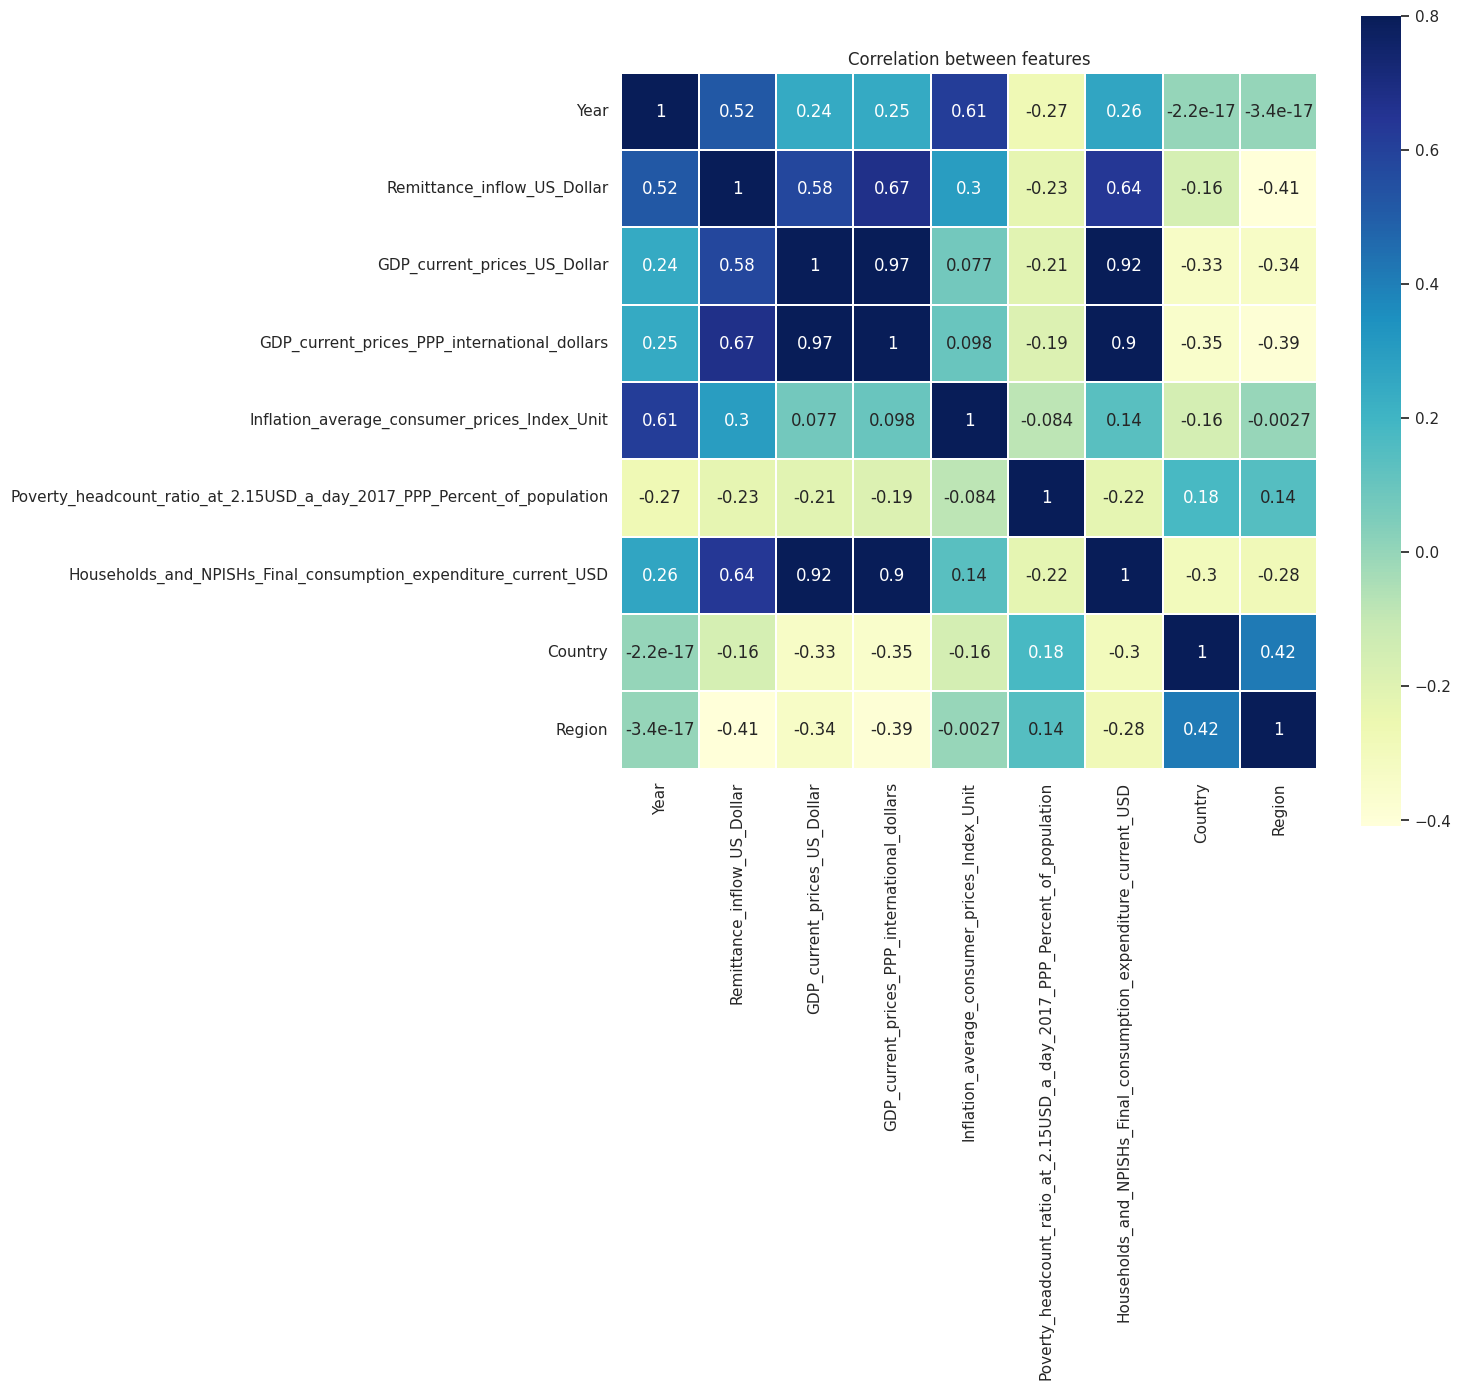

In [108]:
corr=x.corr(numeric_only=True)#["Remittance_inflow_US_Dollar"]
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')
plt.show()

In [109]:
x

,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD,Country,Region
0,0.000000,0.10,0.025582,0.064796,0.068698,0.179629,0.043166,0.444444,0.000000
1,0.043478,0.10,0.026538,0.064796,0.072398,0.179629,0.045058,0.444444,0.000000
2,0.086957,0.20,0.028191,0.064796,0.076745,0.179629,0.046999,0.444444,0.000000
3,0.130435,0.20,0.033392,0.098196,0.080486,0.179629,0.054248,0.444444,0.000000
4,0.173913,0.20,0.039080,0.098196,0.084287,0.497543,0.060148,0.444444,0.000000
...,...,...,...,...,...,...,...,...,...
235,0.826087,0.09,0.002701,0.008016,0.142622,0.179629,0.004462,1.000000,0.666667
236,0.869565,0.07,0.002698,0.008016,0.162853,0.179629,0.004399,1.000000,0.666667
237,0.913043,0.09,0.003223,0.008016,0.182104,0.179629,0.005305,1.000000,0.666667
238,0.956522,0.20,0.003872,0.008016,0.204621,0.027027,0.006508,1.000000,0.666667


In [110]:
y

,Human_Development_Index_HDI_Index_Unit,Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population
0,0.4900,0.240741
1,0.4950,0.240741
2,0.5010,0.240741
3,0.5140,0.240741
4,0.5230,0.240741
...,...,...
235,0.7250,0.240741
236,0.7160,0.240741
237,0.7210,0.240741
238,0.7270,0.015789


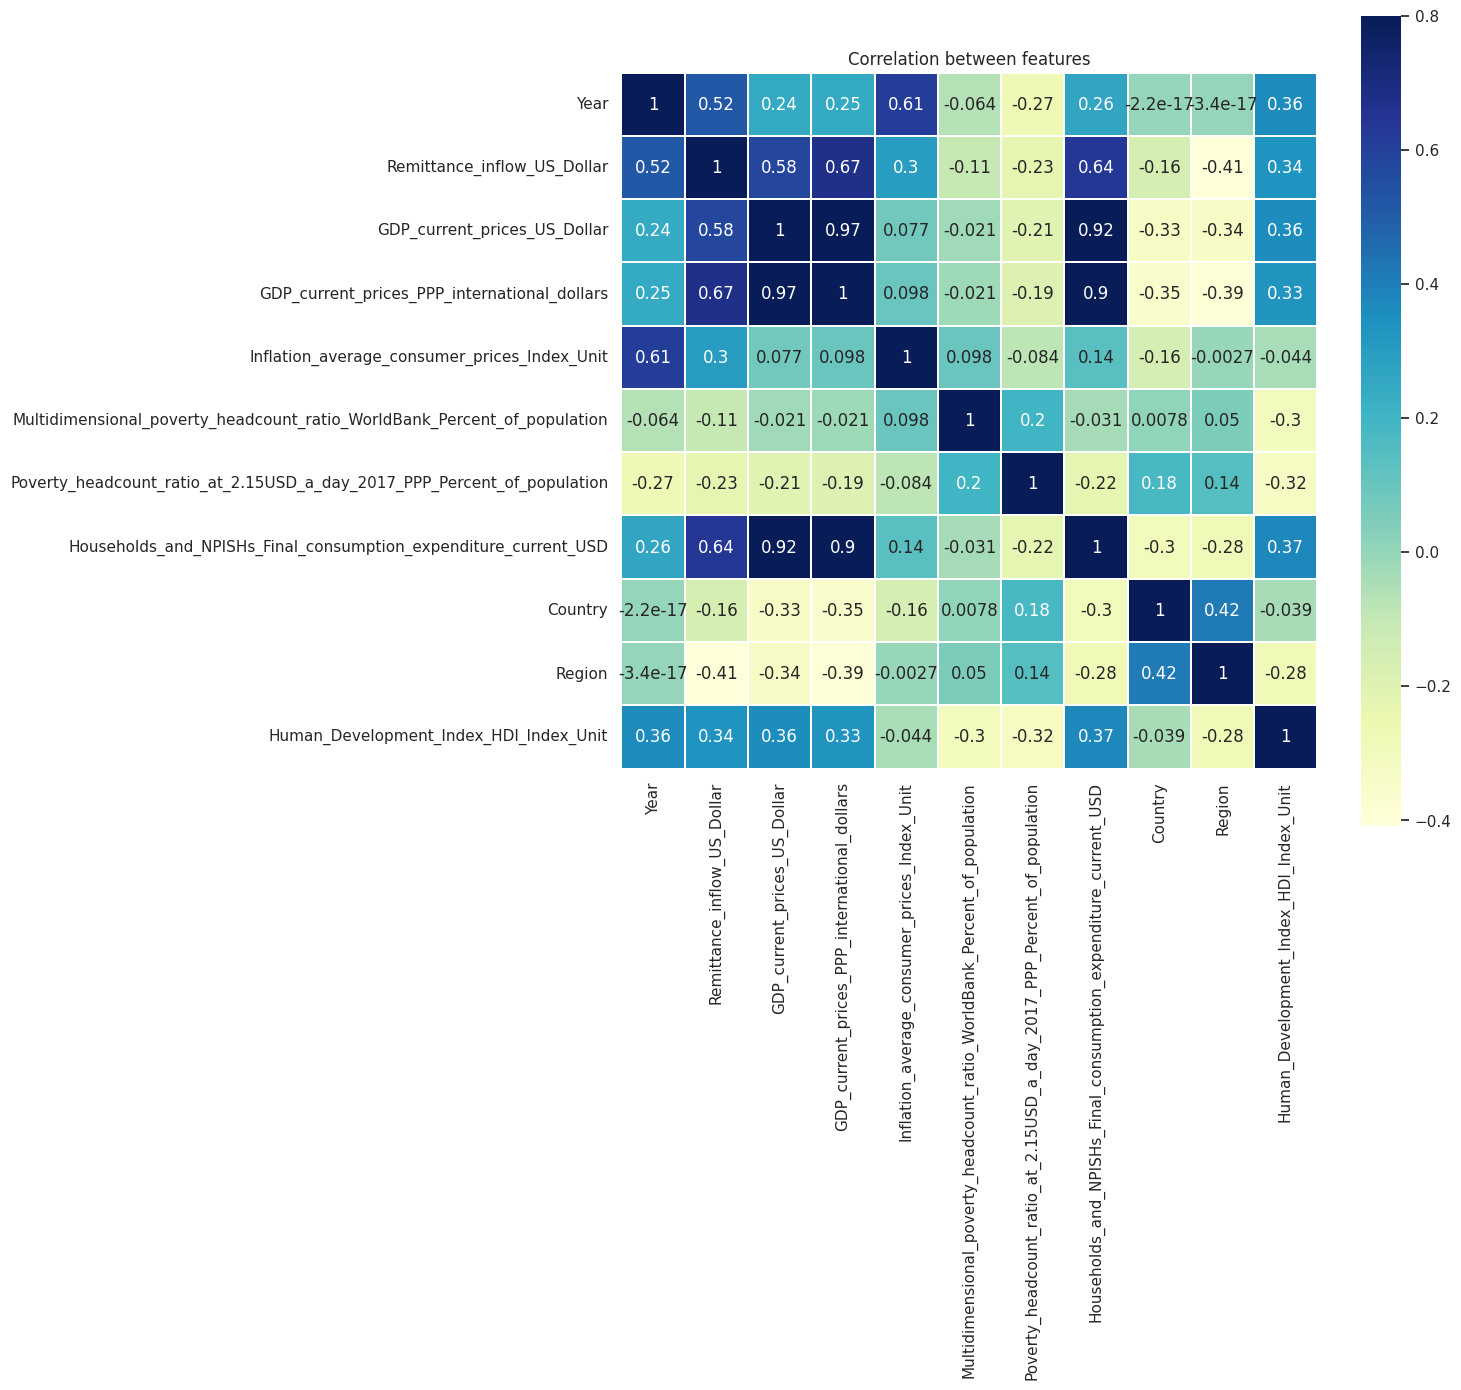

In [111]:
corr=scaled_data2.corr(numeric_only=True)#["Remittance_inflow_US_Dollar"]
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')
plt.show()

In [112]:
#Spliting of data for model training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [113]:
X_train

,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD,Country,Region
29,0.217391,0.20,0.050765,0.064796,0.090265,0.094595,0.095477,0.555556,0.333333
124,0.173913,0.04,0.006733,0.014696,0.046116,0.246929,0.014102,0.777778,0.666667
75,0.130435,0.10,0.004201,0.008016,0.084006,0.165848,0.008601,0.888889,0.000000
82,0.434783,0.20,0.011004,0.014696,0.125336,0.179629,0.020725,0.888889,0.000000
5,0.217391,0.20,0.045316,0.098196,0.087925,0.179629,0.068536,0.444444,0.000000
...,...,...,...,...,...,...,...,...,...
106,0.434783,0.10,0.012218,0.024716,0.045456,0.011057,0.023237,0.222222,0.666667
14,0.608696,0.70,0.113645,0.231797,0.196302,0.179629,0.173831,0.444444,0.000000
92,0.869565,0.30,0.019603,0.028056,0.171415,0.179629,0.039189,0.888889,0.000000
179,0.478261,0.20,0.022538,0.024716,0.199618,0.179629,0.088777,0.666667,1.000000


In [114]:
X_test

,Year,Remittance_inflow_US_Dollar,GDP_current_prices_US_Dollar,GDP_current_prices_PPP_international_dollars,Inflation_average_consumer_prices_Index_Unit,Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population,Households_and_NPISHs_Final_consumption_expenditure_current_USD,Country,Region
24,0.000000,0.08,0.040925,0.031396,0.067860,0.130221,0.074632,0.555556,0.333333
6,0.260870,0.30,0.052037,0.131597,0.094831,0.179629,0.076914,0.444444,0.000000
93,0.913043,0.40,0.021416,0.031396,0.178720,0.035627,0.042877,0.888889,0.000000
109,0.565217,0.20,0.016320,0.031396,0.062904,0.179629,0.033503,0.222222,0.666667
104,0.347826,0.09,0.008897,0.021376,0.031703,0.034398,0.016523,0.222222,0.666667
...,...,...,...,...,...,...,...,...,...
84,0.521739,0.20,0.014006,0.018036,0.136604,0.132678,0.027176,0.888889,0.000000
117,0.913043,0.30,0.023054,0.031396,0.181393,0.179629,0.052993,0.222222,0.666667
194,0.086957,0.02,0.000550,0.000000,0.045493,0.179629,0.001721,0.333333,0.333333
177,0.391304,0.20,0.015998,0.021376,0.155343,0.179629,0.088777,0.666667,1.000000


Model Training With Multiple Algorithms

In [115]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a linear regression model
base_model = LinearRegression()

# Create a MultiOutputRegressor with the linear regression model
multioutput_model = MultiOutputRegressor(base_model)

# Train the multioutput model
multioutput_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [120]:
#creating functions to speed up the process
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


def grid_cv(reg,parameter,Xtrain,ytrain):
      #model_search = RandomizedSearchCV(reg, param_distributions=parameter, scoring="neg_mean_squared_error")
      model_search = HalvingGridSearchCV(reg, parameter, scoring="neg_mean_squared_error")
      model=model_search.fit(Xtrain,ytrain)
      best_params=model_search.best_params_
      return model, best_params


def regression_algorithm(model, Xtrain, Xtest, ytrain, ytest):

  # Fit the algorithm on the training data
  #model.fit(Xtrain, ytrain)

  #errors
  mse_hdi = mean_squared_error(ytest['Human_Development_Index_HDI_Index_Unit'], model.predict(Xtest)[:,0])
  mse_mpov = mean_squared_error(ytest['Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'], model.predict(Xtest)[:,1])


  mae_hdi = mean_absolute_error(ytest['Human_Development_Index_HDI_Index_Unit'], model.predict(Xtest)[:,0])
  mae_mpov = mean_absolute_error(ytest['Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'], model.predict(Xtest)[:,1])


  rmse_hdi = np.sqrt(mean_squared_error(ytest['Human_Development_Index_HDI_Index_Unit'], model.predict(Xtest)[:,0]))
  rmse_mpov = np.sqrt(mean_squared_error(ytest['Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'], model.predict(Xtest)[:,1]))

  mape_hdi= mean_absolute_percentage_error(ytest['Human_Development_Index_HDI_Index_Unit'], model.predict(Xtest)[:,0])
  mape_mpov= mean_absolute_percentage_error(ytest['Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population'], model.predict(Xtest)[:,1])

  #errors = abs(model.predict(Xtest) - ytest)
  #mape = 100 * (errors / ytest)
  #mape = np.mean(np.abs(np.array(errors) / np.array(y_test)))

  r2_hdi=metrics.r2_score(y_test["Human_Development_Index_HDI_Index_Unit"], model.predict(Xtest)[:,0])
  r2_mpov=metrics.r2_score(y_test["Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population"], model.predict(Xtest)[:,1])

  print('MSE Human_Development_Index_HDI_Index_Unit: ',mse_hdi)
  print('MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population: ',mse_mpov)

  print('MAE Human_Development_Index_HDI_Index_Unit: ',mae_hdi)
  print('MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population: ',mae_mpov)

  print('RMSE Human_Development_Index_HDI_Index_Unit: ',rmse_hdi)
  print('RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population: ',rmse_mpov)

  print('r2 Human_Development_Index_HDI_Index_Unit: ',r2_hdi)
  print('r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population: ',r2_mpov)

  print('MAPE Human_Development_Index_HDI_Index_Unit: ',mape_hdi)
  print('MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population: ', mape_mpov)

In [121]:
regression_algorithm(multioutput_model, X_train, X_test, y_train, y_test)

MSE Human_Development_Index_HDI_Index_Unit:  0.005211414329639336
MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.012028338242067053
MAE Human_Development_Index_HDI_Index_Unit:  0.06205876166938262
MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.04110934318050721
RMSE Human_Development_Index_HDI_Index_Unit:  0.07219012626141705
RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.10967378101473046
r2 Human_Development_Index_HDI_Index_Unit:  0.3322671479128738
r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.046574180935902154
MAPE Human_Development_Index_HDI_Index_Unit:  0.10097180558397806
MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.5594960075037112


In [123]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a linear regression model
base_model = LinearRegression()

# Create a MultiOutputRegressor with the linear regression model
multioutput_model = MultiOutputRegressor(base_model)

# Train the multioutput model
multioutput_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [124]:
regression_algorithm(multioutput_model, X_train, X_test, y_train, y_test)

MSE Human_Development_Index_HDI_Index_Unit:  0.005211414329639336
MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.012028338242067053
MAE Human_Development_Index_HDI_Index_Unit:  0.06205876166938262
MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.04110934318050721
RMSE Human_Development_Index_HDI_Index_Unit:  0.07219012626141705
RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.10967378101473046
r2 Human_Development_Index_HDI_Index_Unit:  0.3322671479128738
r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.046574180935902154
MAPE Human_Development_Index_HDI_Index_Unit:  0.10097180558397806
MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.5594960075037112


In [125]:
multioutput_model.predict(X_test)

array([[0.60180674, 0.23919202],
       [0.60212201, 0.24917673],
       [0.72825243, 0.20638376],
       [0.60916062, 0.23519641],
       [0.60069525, 0.2366133 ],
       [0.56407915, 0.24803484],
       [0.65213839, 0.23995509],
       [0.68021623, 0.22344085],
       [0.5882884 , 0.24826477],
       [0.62550085, 0.25077349],
       [0.68293192, 0.21248086],
       [0.64822612, 0.24021556],
       [0.6187464 , 0.22896369],
       [0.55074496, 0.24802632],
       [0.63490995, 0.22860342],
       [0.64219508, 0.2392684 ],
       [0.56600282, 0.24624212],
       [0.62684987, 0.22911643],
       [0.60133722, 0.2518143 ],
       [0.5778443 , 0.25226256],
       [0.59427233, 0.24676013],
       [0.63460437, 0.23438334],
       [0.65297033, 0.24056081],
       [0.63299235, 0.21995613],
       [0.57569791, 0.23243504],
       [0.59741055, 0.25393525],
       [0.63006883, 0.23002734],
       [0.61686398, 0.24676139],
       [0.65653363, 0.2416881 ],
       [0.60461602, 0.25103582],
       [0.

Random Forest

In [126]:
%%time
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#parameter grid
param_grid = {
    'estimator__criterion': ["squared_error", "absolute_error", "friedman_mse"],
    #'estimator__bootstrap': [True],
    'estimator__max_depth': [80, 90, 100],
    'estimator__max_features': ["sqrt", "log2"],
    'estimator__min_samples_leaf': [1,3,5,9],
    'estimator__min_samples_split': [8, 10, 12],
    #'estimator__n_estimators': [100,300,1000]
}
rf=RandomForestRegressor()
reg=MultiOutputRegressor(rf)

#using the function
model,best_parameter=grid_cv(reg,param_grid, X_train, y_train)

CPU times: user 7min 31s, sys: 5.94 s, total: 7min 37s
Wall time: 8min 9s


In [127]:

best_parameter

{'estimator__criterion': 'friedman_mse',
 'estimator__max_depth': 80,
 'estimator__max_features': 'log2',
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 8}

Evaluation

In [128]:
#rf_class=RandomForestRegressor(criterion= 'friedman_mse', max_depth= 80,max_features= 'log2',min_samples_leaf= 1,min_samples_split=8 )
regression_algorithm(model, X_train, X_test, y_train, y_test)

MSE Human_Development_Index_HDI_Index_Unit:  0.0015331234159901104
MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.01028960541974794
MAE Human_Development_Index_HDI_Index_Unit:  0.031057176679451688
MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.032278154272688
RMSE Human_Development_Index_HDI_Index_Unit:  0.03915511992051755
RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.1014376923029499
r2 Human_Development_Index_HDI_Index_Unit:  0.8035625635562387
r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.18439477858550313
MAPE Human_Development_Index_HDI_Index_Unit:  0.05014538395036757
MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.3826872357906651


In [129]:
model.predict(X_test)[:,0]

array([0.64334781, 0.60007651, 0.68789707, 0.64024789, 0.64205461,
       0.5147309 , 0.69446483, 0.67785111, 0.64654779, 0.57867027,
       0.74727428, 0.62629569, 0.64093821, 0.55663136, 0.6362361 ,
       0.68700502, 0.54441256, 0.62407707, 0.56431902, 0.49771725,
       0.52323287, 0.64075608, 0.69138646, 0.70399575, 0.51035087,
       0.55512929, 0.63944471, 0.59308855, 0.689903  , 0.57036134,
       0.58792297, 0.6758149 , 0.65135494, 0.5286204 , 0.64086663,
       0.7140878 , 0.58545098, 0.647908  , 0.65475938, 0.50907158,
       0.67230146, 0.6274589 , 0.63128384, 0.64303757, 0.5803674 ,
       0.71815974, 0.624519  , 0.75359178, 0.5627097 , 0.71625059,
       0.61421647, 0.53843387, 0.62981353, 0.57946861, 0.65156108,
       0.63404406, 0.65715866, 0.6043577 , 0.64388904, 0.55812951,
       0.68199941, 0.52273503, 0.51738124, 0.71815974, 0.63175909,
       0.73285716, 0.64645093, 0.66102699, 0.64791465, 0.57943909,
       0.51102478, 0.64207124])

XGBoost

In [130]:
%%time
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
#import scipy.stats as stats


param_grid_xg = {
         'estimator__booster': ['gbtree','gblinear'],
         #'estimator__max_depth': [3, 5, 7,10],
         'estimator__learning_rate': [0.1, 0.01, 0.001],
         #'estimator__subsample': [0.5, 0.7, 1],
         'estimator__n_estimators': [100,200,500],
         #'estimator__min_child_weight': list(range(1,6,2))
          }
xg= xgb.XGBRegressor()
reg=MultiOutputRegressor(xg)
xg_model,xg_best_parameter=grid_cv(reg,param_grid_xg, X_train, y_train)

CPU times: user 31.5 s, sys: 846 ms, total: 32.4 s
Wall time: 18.8 s


In [131]:
xg_best_parameter

{'estimator__booster': 'gbtree',
 'estimator__learning_rate': 0.01,
 'estimator__n_estimators': 100}

In [132]:
#evaluation
regression_algorithm(xg_model, X_train, X_test, y_train, y_test)

MSE Human_Development_Index_HDI_Index_Unit:  0.0018613003959504146
MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.010306717296866726
MAE Human_Development_Index_HDI_Index_Unit:  0.03368092933495839
MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.02628186049239575
RMSE Human_Development_Index_HDI_Index_Unit:  0.04314279077610087
RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.10152200400340178
r2 Human_Development_Index_HDI_Index_Unit:  0.7615136039154882
r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.1830384062313699
MAPE Human_Development_Index_HDI_Index_Unit:  0.05548067634262732
MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.28403369362529707


In [133]:
xg_model.predict(X_test)

array([[0.68112606, 0.24110234],
       [0.583391  , 0.24086413],
       [0.6736994 , 0.12941903],
       [0.67192453, 0.24086413],
       [0.6477373 , 0.12950814],
       [0.5314635 , 0.24086413],
       [0.6736994 , 0.24086413],
       [0.6730005 , 0.24086413],
       [0.65598255, 0.24087152],
       [0.62391764, 0.24086413],
       [0.70892066, 0.24086413],
       [0.6266055 , 0.2923981 ],
       [0.67192453, 0.24086413],
       [0.624131  , 0.24086413],
       [0.65575975, 0.1247618 ],
       [0.6730005 , 0.24086413],
       [0.5688168 , 0.24086413],
       [0.6256889 , 0.4531201 ],
       [0.5577366 , 0.24086413],
       [0.5314635 , 0.24087152],
       [0.53822166, 0.24086413],
       [0.62926245, 0.24110234],
       [0.6736994 , 0.24086413],
       [0.68112606, 0.23728302],
       [0.53822166, 0.24086413],
       [0.5577366 , 0.24086413],
       [0.64219517, 0.24086413],
       [0.5987299 , 0.24086413],
       [0.6736994 , 0.24086413],
       [0.57504094, 0.24086413],
       [0.

Support Vector Regressor

In [134]:
%%time
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

param_grid_svr= {'estimator__C': [0.1, 1, 10, 100, 1000],
              'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'estimator__kernel': ['linear','rbf', 'poly', 'sigmoid']
}


svr= SVR()
svr_reg=MultiOutputRegressor(svr)
svr_model,svr_best_parameter=grid_cv(svr_reg,param_grid_svr, X_train, y_train)

CPU times: user 9.31 s, sys: 85.5 ms, total: 9.4 s
Wall time: 9.46 s


In [135]:
svr_best_parameter

{'estimator__C': 1, 'estimator__gamma': 1, 'estimator__kernel': 'linear'}

Evaluation

In [139]:
regression_algorithm(svr_model, X_train, X_test, y_train, y_test)

MSE Human_Development_Index_HDI_Index_Unit:  0.005648886631002558
MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.012979357265813464
MAE Human_Development_Index_HDI_Index_Unit:  0.06771030028683829
MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.06137418486896356
RMSE Human_Development_Index_HDI_Index_Unit:  0.07515907550657178
RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.11392698216758602
r2 Human_Development_Index_HDI_Index_Unit:  0.2762142975691554
r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  -0.02880830943087509
MAPE Human_Development_Index_HDI_Index_Unit:  0.11077903187419097
MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.5414335907874094


Stochastic Gradient descent

In [136]:
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor



param_grid_sgd = {
    'estimator__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    #'estimator__n_iter': [1000], # number of epochs
    'estimator__loss': ["squared_error", "huber", "epsilon_insensitive"], # logistic regression,
    'estimator__penalty': ["l2", "l1", "elasticnet"],
    #'estimator__n_jobs': [-1]
}

sgd = SGDRegressor()
sgd_reg=MultiOutputRegressor(sgd)
sgd_model,sgd_best_parameter=grid_cv(sgd_reg,param_grid_sgd, X_train, y_train)

In [137]:
sgd_best_parameter

{'estimator__alpha': 100.0,
 'estimator__loss': 'epsilon_insensitive',
 'estimator__penalty': 'l2'}

In [138]:
#Evaluation
regression_algorithm(sgd_model, X_train, X_test, y_train, y_test)

MSE Human_Development_Index_HDI_Index_Unit:  0.007937368003054614
MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.018176291232475602
MAE Human_Development_Index_HDI_Index_Unit:  0.07557935113244804
MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.09496553936851432
RMSE Human_Development_Index_HDI_Index_Unit:  0.08909190761822655
RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.1348194764582462
r2 Human_Development_Index_HDI_Index_Unit:  -0.017006332542274016
r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  -0.44074310242314385
MAPE Human_Development_Index_HDI_Index_Unit:  0.12391564084032153
MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population:  0.6484560119606688


Assessing Model Performance

In [160]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'SGD'],
    'MSE Human_Development_Index_HDI_Index_Unit': [0.005211414, 0.001533123, 0.0018613, 0.005648887, 0.007937368],
    'MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': [0.012028338, 0.010289605, 0.010306717, 0.012979357, 0.018176291],
    'MAE Human_Development_Index_HDI_Index_Unit' :	[0.062058762, 0.031057177,	0.033680929, 0.0677103, 0.075579351],
    'MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': [0.041109343, 0.032278154, 0.02628186, 0.061374185, 0.094965539],
    'RMSE Human_Development_Index_HDI_Index_Unit': [0.072190126, 0.03915512, 0.043142791, 0.075159076, 0.089091908],
    'RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': [0.109673781, 0.101437692, 0.101522004, 0.113926982, 0.134819476],
    'r2 Human_Development_Index_HDI_Index_Unit': [0.332267148, 0.803562564, 0.761513604, 0.276214298, -0.017006333],
    'r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population':	[0.046574181, 0.184394779, 0.183038406, -0.028808309, -0.440743102],
    'MAPE Human_Development_Index_HDI_Index_Unit': [0.100971806, 0.050145384, 0.055480676, 0.110779032, 0.123915641],
    'MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': [0.559496008, 0.382687236, 0.284033694, 0.541433591, 0.648456012]
}

# Create a DataFrame from the data

df = pd.DataFrame(data)



In [168]:
df

,Model,MSE Human_Development_Index_HDI_Index_Unit,MSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,MAE Human_Development_Index_HDI_Index_Unit,MAE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,RMSE Human_Development_Index_HDI_Index_Unit,RMSE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,r2 Human_Development_Index_HDI_Index_Unit,r2 Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population,MAPE Human_Development_Index_HDI_Index_Unit,MAPE Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population
0,Linear Regression,0.005211,0.012028,0.062059,0.041109,0.072190,0.109674,0.332267,0.046574,0.100972,0.559496
1,Random Forest,0.001533,0.010290,0.031057,0.032278,0.039155,0.101438,0.803563,0.184395,0.050145,0.382687
2,XGBoost,0.001861,0.010307,0.033681,0.026282,0.043143,0.101522,0.761514,0.183038,0.055481,0.284034
3,SVR,0.005649,0.012979,0.067710,0.061374,0.075159,0.113927,0.276214,-0.028808,0.110779,0.541434
4,SGD,0.007937,0.018176,0.075579,0.094966,0.089092,0.134819,-0.017006,-0.440743,0.123916,0.648456


Saving Minimun and Maximum Value for Deployment

In [179]:
!pip install toolz
from toolz import merge

In [176]:
min_max_dict = min_max_dict_num.update(min_max_dict_cat)

In [181]:
min_max_dict

{'Year': {'max': 2023, 'min': 2000},
 'Remittance_inflow_US_Dollar': {'max': 100000000000.0, 'min': 0.0},
 'GDP_current_prices_US_Dollar': {'max': 17848500000000.0,
  'min': 12106000000.0},
 'GDP_current_prices_PPP_international_dollars': {'max': 30000000000000.0,
  'min': 60000000000.0},
 'Inflation_average_consumer_prices_Index_Unit': {'max': 571.766,
  'min': 8.226},
 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': {'max': 39.7,
  'min': 1.7},
 'Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population': {'max': 81.5,
  'min': 0.1},
 'Households_and_NPISHs_Final_consumption_expenditure_current_USD': {'max': 6792010000000.0,
  'min': 5610550954.0},
 'Country': {'max': 9, 'min': 0},
 'Region': {'max': 3, 'min': 0}}

In [182]:
print(min_max_dict)

{'Year': {'max': 2023, 'min': 2000}, 'Remittance_inflow_US_Dollar': {'max': 100000000000.0, 'min': 0.0}, 'GDP_current_prices_US_Dollar': {'max': 17848500000000.0, 'min': 12106000000.0}, 'GDP_current_prices_PPP_international_dollars': {'max': 30000000000000.0, 'min': 60000000000.0}, 'Inflation_average_consumer_prices_Index_Unit': {'max': 571.766, 'min': 8.226}, 'Multidimensional_poverty_headcount_ratio_WorldBank_Percent_of_population': {'max': 39.7, 'min': 1.7}, 'Poverty_headcount_ratio_at_2.15USD_a_day_2017_PPP_Percent_of_population': {'max': 81.5, 'min': 0.1}, 'Households_and_NPISHs_Final_consumption_expenditure_current_USD': {'max': 6792010000000.0, 'min': 5610550954.0}, 'Country': {'max': 9, 'min': 0}, 'Region': {'max': 3, 'min': 0}}


Saving Model and dependencies for deployment

In [187]:
import pickle

In [188]:
filename = 'model.pkl'
pickle.dump(xg_model, open(filename, 'wb'))

In [189]:
import json
with open("cat_dict.json", 'wb') as fp:
    pickle.dump(cat_dict, fp)

In [190]:
with open('min_max_dict.json', 'wb') as fp:
    pickle.dump(min_max_dict, fp)